<a href="https://colab.research.google.com/github/FadhilaSalviaK/DataMining507/blob/main/4101422010_Tugas%20Data%20Mining_NN%20%26%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Library**

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
sns.set()

**Load Dataset**

In [270]:
sleepdisorder=pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')

**Processing Data**

In [271]:
sleepdisorder.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [272]:
sleepdisorder.tail(15)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
359,360,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,NaN
360,361,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
361,362,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
362,363,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
363,364,Female,59,Nurse,8.2,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
364,365,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
365,366,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
366,367,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
367,368,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
368,369,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


Berdasarkan output tersebut kita ketahui bahwa dataset "Sleep_health_and_lifestyle" memiliki total pengamatan sebanyak **373**.

In [273]:
#melihat statistika deskriptif
sleepdisorder.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Output di atas digunakan untuk melihat statistika deskriptif dari dataset yang meliputi count, mean, std, min, max dari setiap kolom.

**PROCESSING DATA**

**1. MISSING VALUE**

In [274]:
# menampilkan informasi tipe data setiap kolom & mengecek missing values
sleepdisorder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Berdasarkan output diatas, dapat disimpulkan bahwa dataset tersebut, memiliki total: 13 kolom, dengan jumlah maksimal baris untuk setiap kolom sebanyak: 374 baris.

Dari output tersebut dapat terlihat bahwa seluruh kolom memenuhi 374 baris yang mana artinya tidak ada yang melebii 374 ataupun kurang dari 374. Hal tersebut menunjukkan bahwa dataset ini tidak memiliki missing value (kekosongan).

In [275]:
sleepdisorder.isnull()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,False,False,False,False,False,False,False,False,False,False,False,False,False
370,False,False,False,False,False,False,False,False,False,False,False,False,False
371,False,False,False,False,False,False,False,False,False,False,False,False,False
372,False,False,False,False,False,False,False,False,False,False,False,False,False


In [276]:
# menampilkan missing values di setiap kolom
np.sum(sleepdisorder.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [277]:
#mengetahui jumlah missing value di seluruh dataset
sleepdisorder.isnull().sum().sum()

np.int64(219)

Output menunjukkan bahwa terdapat 219 data yang hilang yaitu pada kolom Sleep Disorder, oleh karena itu perlu adanya penanganan missing value.

In [278]:
#melihat isi dalam kolom Sleep Disorder
sleepdisorder['Sleep Disorder'].unique()

array([nan, 'Sleep Apnea', 'Insomnia'], dtype=object)

In [279]:
#jumlah missing value kolom Sleep Disorder
np.sum(sleepdisorder['Sleep Disorder'].isnull())

np.int64(219)

In [280]:
# menangani missing value kolom Sleep Disorder
# Check if the mode series is empty before accessing element 0
mode_values = sleepdisorder['Sleep Disorder'].mode()
if len(mode_values) > 0:
    sleepdisorder['Sleep Disorder'] = sleepdisorder['Sleep Disorder'].fillna(mode_values[0])
else:
    # Handle the case where mode is empty (e.g., fill with a default value)
    sleepdisorder['Sleep Disorder'] = sleepdisorder['Sleep Disorder'].fillna('Unknown')  # Replace 'Unknown' with your desired default value

In [281]:
#jumlah missing value kolom Sleep Disorder (setelah penanganan)
np.sum(sleepdisorder['Sleep Disorder'].isnull())

np.int64(0)

In [282]:
# Get the actual column names in your DataFrame
print(sleepdisorder.columns)

# Assuming the column is named 'Stress Level' and contains 'Normal', 'Mild', 'Moderate', 'Severe' values:
count_values = sleepdisorder['Stress Level'].value_counts()
print(count_values)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')
Stress Level
3    71
8    70
4    70
5    67
7    50
6    46
Name: count, dtype: int64


In [283]:
# Menghitung rata-rata berdasarkan nilai 'Sleep Disorder'
# Select only numeric columns for calculating the mean
numeric_cols = sleepdisorder.select_dtypes(include=np.number).columns
mean_by_outcome = sleepdisorder.groupby('Sleep Disorder')[numeric_cols].mean()

# Menampilkan rata-rata untuk setiap variabel berdasarkan nilai 'Sleep Disorder'
print(mean_by_outcome)

                 Person ID        Age  Sleep Duration  Quality of Sleep  \
Sleep Disorder                                                            
Insomnia        216.272727  43.519481        6.589610          6.532468   
Sleep Apnea     180.040404  41.838384        7.272727          7.515152   

                Physical Activity Level  Stress Level  Heart Rate  Daily Steps  
Sleep Disorder                                                                  
Insomnia                      46.818182      5.870130   70.467532  5901.298701  
Sleep Apnea                   62.373737      5.259259   70.087542  7054.208754  


In [284]:
for col in sleepdisorder.columns:
    if sleepdisorder[col].isnull().sum() > 0:
        if sleepdisorder[col].dtype == "object":
            sleepdisorder[col].fillna(sleepdisorder[col].mode()[0], inplace=True)
        else:
            sleepdisorder[col].fillna(sleepdisorder[col].median(), inplace=True)

**DATA CLEANING**

In [285]:
# Drop 'Person ID' column if exists
if 'Person ID' in sleepdisorder.columns:
    sleepdisorder.drop(columns=['Person ID'], inplace=True)

In [286]:
# Drop missing values
sleepdisorder.dropna(inplace=True)

Berdasarkan datset, terdapat 3 label yaitu insomnia, apnea, dan tidak. Disini akan dilakukan perubahan kolom Sleep Disorder menjadi dua kelas saja yaitu insomnia dan tidak.

In [287]:
# Ubah label Sleep Disorder menjadi 2 kelas: Insomnia dan Tidak
sleepdisorder['Sleep Disorder'] = sleepdisorder['Sleep Disorder'].apply(lambda x: 'Insomnia' if x == 'Insomnia' else 'Tidak')

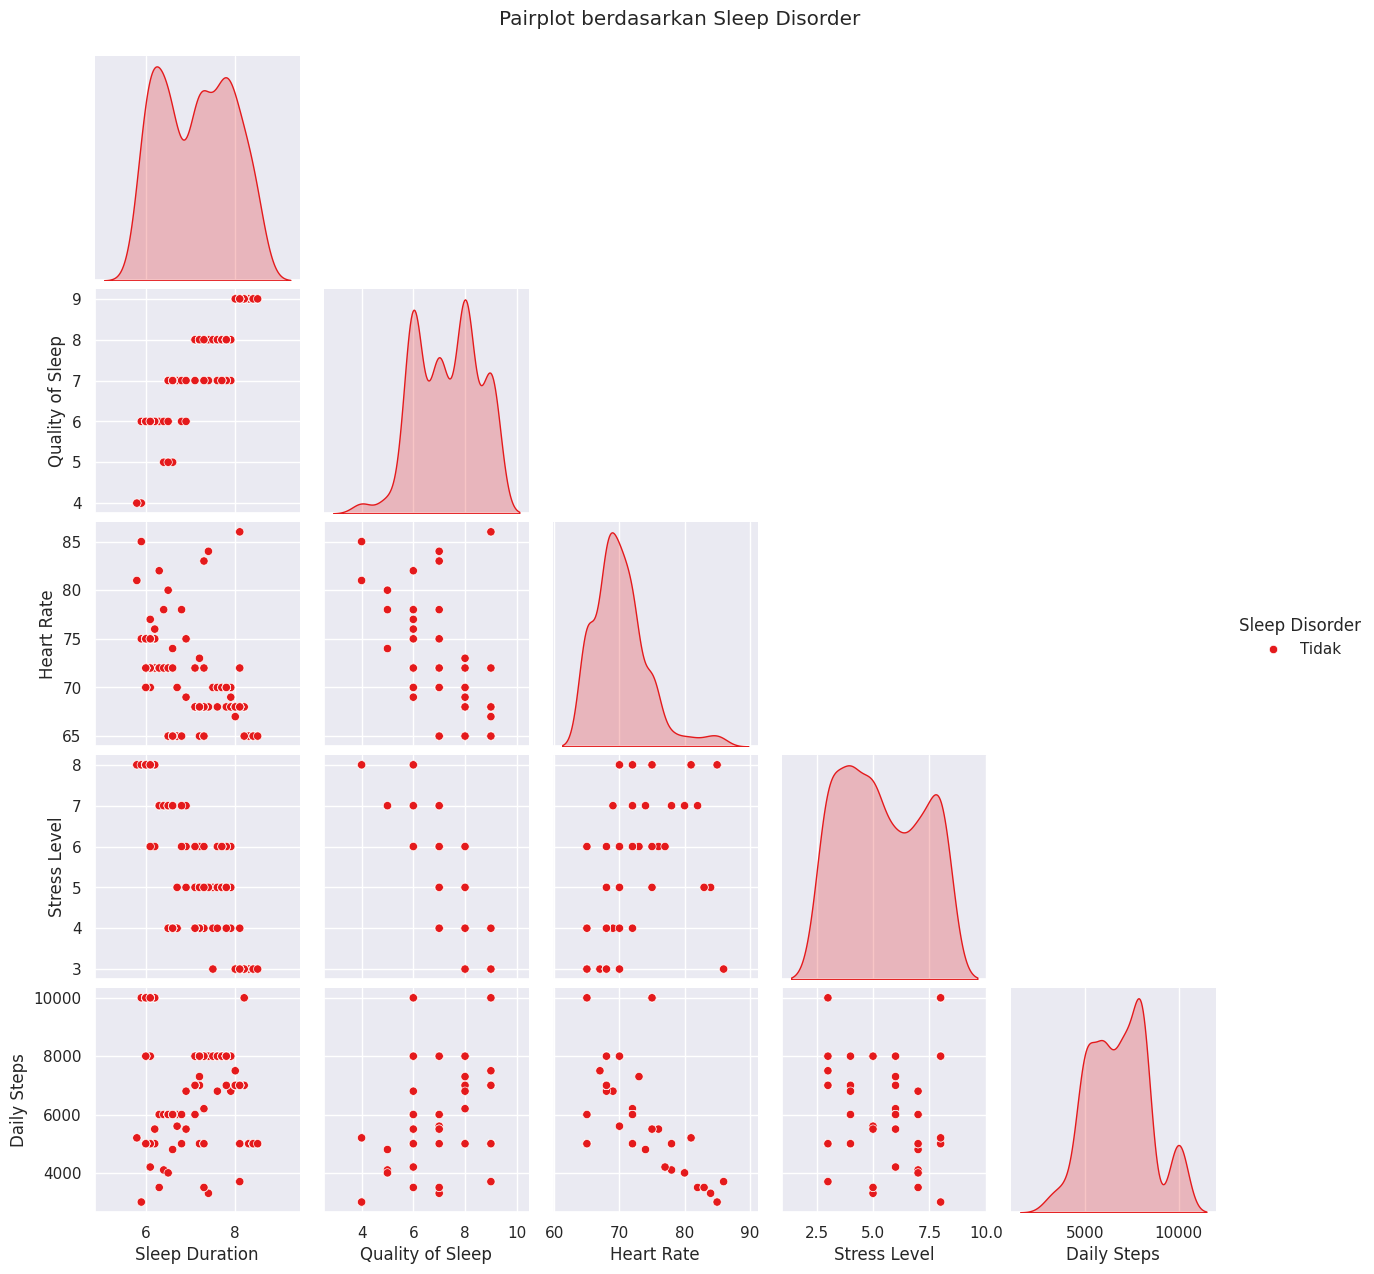

In [288]:
# Salin dataframe untuk visualisasi
df_vis = sleepdisorder.copy()

# Ubah Sleep Disorder jadi label teks jika masih dalam bentuk angka
df_vis['Sleep Disorder'] = df_vis['Sleep Disorder'].apply(lambda x: 'Insomnia' if x == 1 else 'Tidak')

# Buat pairplot dengan hue berdasarkan label Sleep Disorder
sns.pairplot(df_vis,
             vars=['Sleep Duration', 'Quality of Sleep', 'Heart Rate', 'Stress Level', 'Daily Steps'],
             hue='Sleep Disorder',
             palette='Set1',
             corner=True)

plt.suptitle('Pairplot berdasarkan Sleep Disorder', y=1.02)
plt.show()

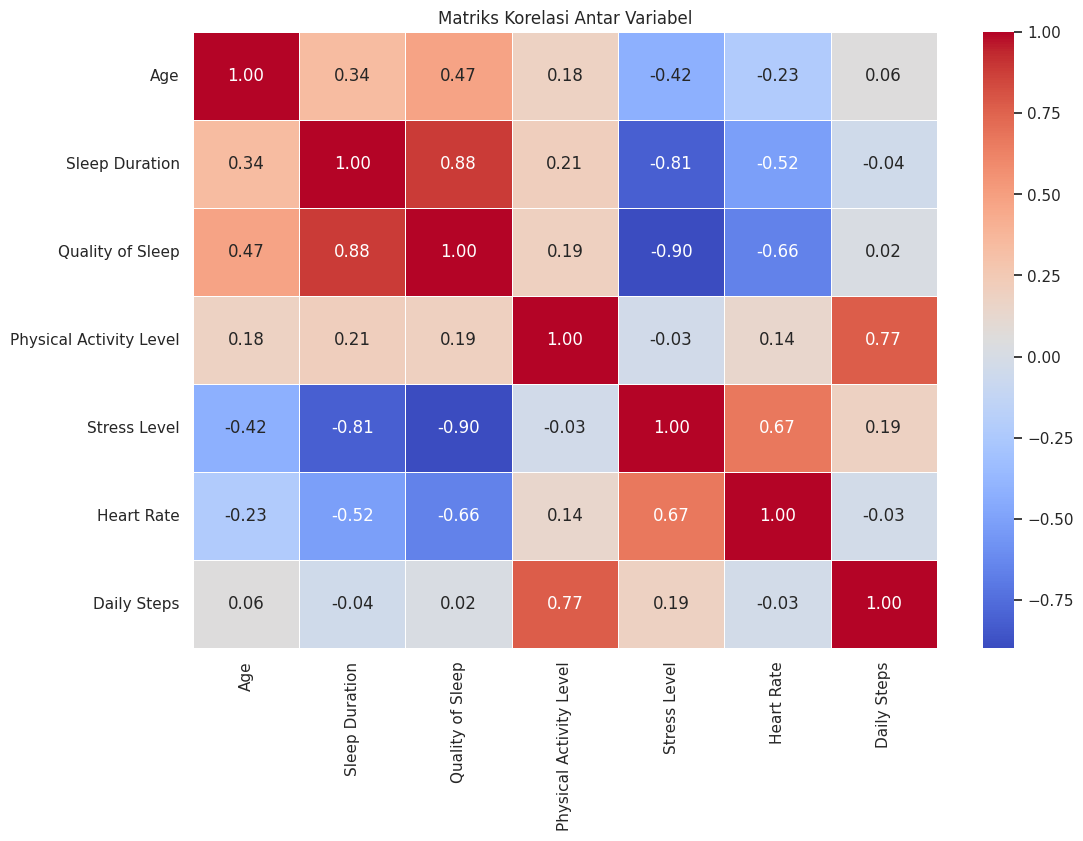

In [289]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Hitung korelasi antar variabel numerik, pilih kolom numerik saja
correlation_matrix = sleepdisorder.select_dtypes(include=np.number).corr()

# Tampilkan matriks korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel")
plt.show()

Nilai korelasi antar variabel terletak diantara -1 hingga 1. Apabila nilai korelasi menunjukkan nilai 1 maka artinya terdapat hubungan positif yang sempurna, muncul 0 artinya tidak ada hubungan linear, dan -1 apabila terdapat hubungan negatif yang sempurna.

Nilai korelasi ini membantu untuk memahami sejauh mana setiap variabel memiliki hubungan dengan variabel target 'Outcome' (insomnia atau tidak). Semakin tinggi nilai korelasi (positif atau negatif), semakin besar hubungan antara variabel tersebut dengan keberadaan insomnia pada dataset.

**2. OUTLIER**

**2.1 BOXPLOT**

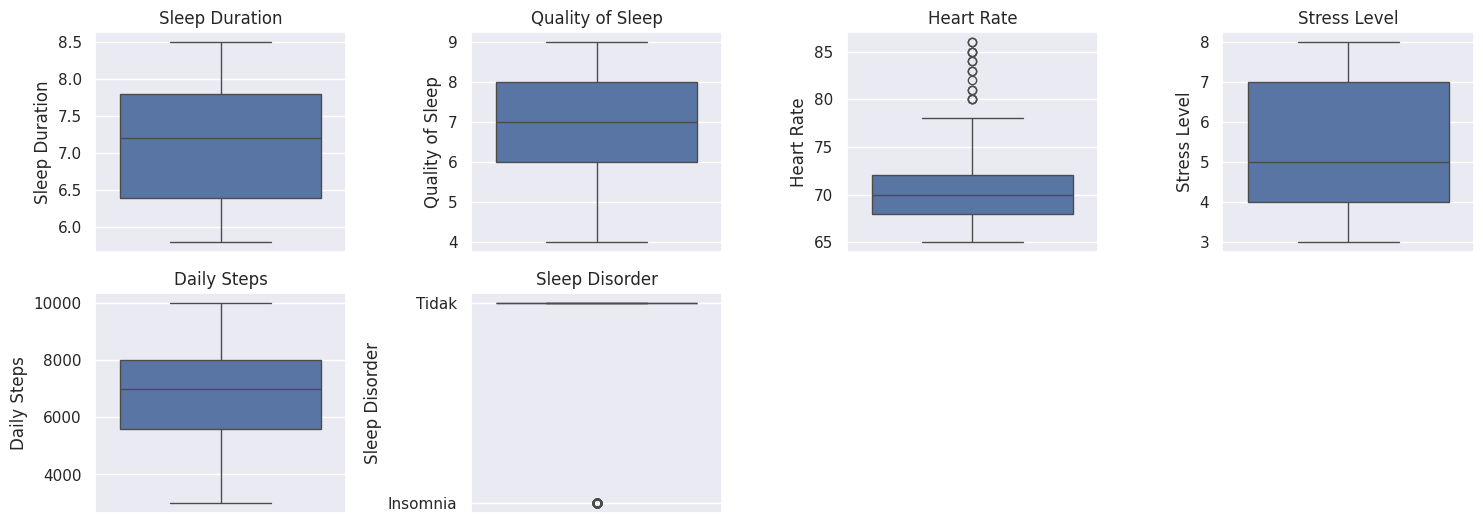

In [290]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Sleep Duration', 'Quality of Sleep', 'Heart Rate',
            'Stress Level', 'Daily Steps', 'Sleep Disorder']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=sleepdisorder[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Identifikasi outlier dalam dataset
> Berdasarkan hasil output boxplot, dapat terlihat outlier untuk masing-masing kolom
> 1. Kolom Sleep Duration
      menunjukkan bahwa semua titik berada di dalam rentang whiskers sehingga hal tersebut mengartikan bahwa tidak adanya outlier pada kolom ini.
> 2. Kolom Quality of Sleep
      menunjukkan bahwa semua titik berada di dalam rentang whiskers sehingga hal tersebut mengartikan bahwa tidak adanya outlier pada kolom ini.
> 3. Kolom Heart Rate
      menunjukkan bahwa terdapat titik yang letaknya diluar rentang whiskers. Hal tersebut mengindikasikan bahwa adanyan outlier pada kolom ini.
> 4. Kolom Stress Level
      menunjukkan bahwa semua titik berada di dalam rentang whiskers sehingga hal tersebut mengartikan bahwa tidak adanya outlier pada kolom ini.
> 5. Kolom Daily Steps
      menunjukkan bahwa semua titik berada di dalam rentang whiskers sehingga hal tersebut mengartikan bahwa tidak adanya outlier pada kolom ini.
> 6. Sleep Disorder
      menunjukkan bahwa terdapat titik yang letaknya diluar rentang whiskers. Hal tersebut mengindikasikan bahwa adanyan outlier pada kolom ini.


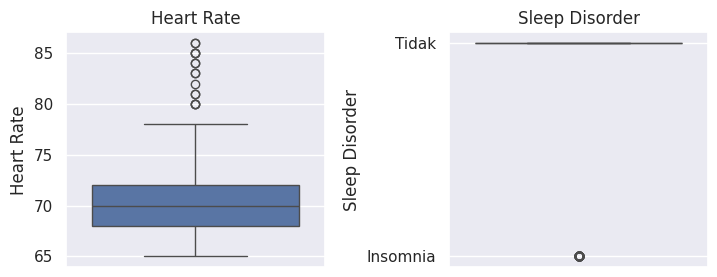

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

#Kolom Numerik yang ingin dicek outliernya
num_cols = ['Heart Rate','Sleep Disorder']

#Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate (num_cols, 1):
    plt.subplot(3, 4, i)
    # Use 'sleepdisorder' instead of 'data'
    sns.boxplot(y=sleepdisorder[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**2.2 IQR**

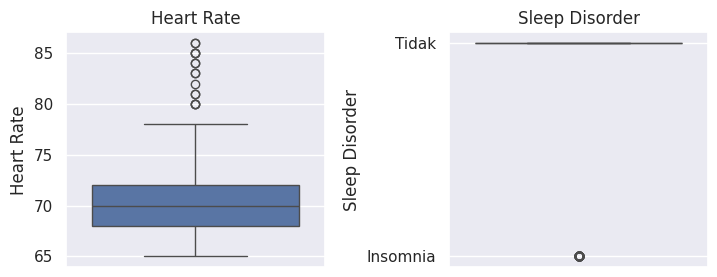

Heart Rate: 15 outliers
Sleep Disorder: 0 outliers


In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

#Kolom Numerik yang ingin dicek outliernya
num_cols = ['Heart Rate','Sleep Disorder']

#Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate (num_cols, 1):
    plt.subplot(3, 4, i)
    # Use 'sleepdisorder' instead of 'data'
    sns.boxplot(y=sleepdisorder[col])
    plt.title(col)
plt.tight_layout()
plt.show()

def detect_outliers_iqr(data, column):
    # Check if the column is numeric before calculating quantiles
    if pd.api.types.is_numeric_dtype(data[column]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1  # Rentang interkuartil
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    else:
        return pd.DataFrame()  # Return empty DataFrame if not numeric

# Cek jumlah outlier untuk setiap kolom numerik
for col in num_cols:
    # Replace 'data' with 'sleepdisorder'
    outliers = detect_outliers_iqr(sleepdisorder, col)
    print(f"{col}: {len(outliers)} outliers")

Berdasarkan hasil output IQR, dapat terlihat bahwa kolom yang memiliki outlier adalah kolom Heart Rate sebanyak 15 outliers dan kolom Sleep Disorder sebanyak 0 outliers. Sehingga diperlukan penanganan outlier.

**2.3 PENANGANAN OUTLIER**

In [293]:
def winsorize_iqr(data, column):
    # Check if the column is numeric before calculating quantiles
    if pd.api.types.is_numeric_dtype(data[column]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
        data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])
    else:
        print(f"Skipping winsorization for non-numeric column: {column}")  # Add this line

# Penanganan outlier dengan menerapkan Winsorizing
for col in num_cols:
    # Replace 'data' with 'sleepdisorder' to use your DataFrame
    winsorize_iqr(sleepdisorder, col)

Skipping winsorization for non-numeric column: Sleep Disorder


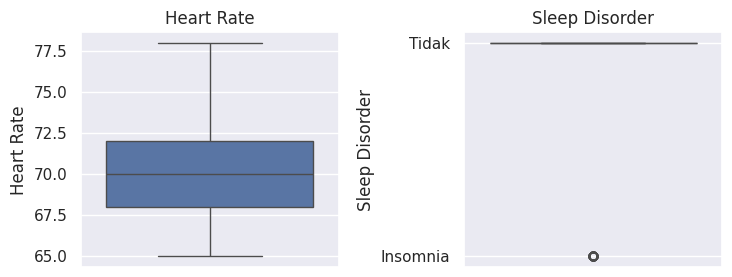

In [294]:
#cek boxplot lagi
num_cols = ['Heart Rate','Sleep Disorder']

#Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate (num_cols, 1):
    plt.subplot(3, 4, i)
    # Use 'sleepdisorder' instead of 'data'
    sns.boxplot(y=sleepdisorder[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**3. ENCODING**

In [295]:
# Encode categorical columns
label_cols = sleepdisorder.select_dtypes(include='object').columns
le = LabelEncoder()
for col in label_cols:
    sleepdisorder[col] = le.fit_transform(sleepdisorder[col])

In [296]:
label_encoder = LabelEncoder()
categorical_cols = sleepdisorder.select_dtypes(include='object').columns
for col in categorical_cols:
    sleepdisorder[col] = label_encoder.fit_transform(sleepdisorder[col])

**MEMISAHKAN VARIABEL X DAN Y**

In [297]:
X = sleepdisorder.drop('Sleep Disorder', axis=1)
y = sleepdisorder['Sleep Disorder']

In [298]:
# Normalize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**MEMBAGI DATA TRAINING DAN TESTING**

In [299]:
# rain-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)


from sklearn.model_selection import train_test_split:
Baris ini berfungsi untuk mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini digunakan untuk memisahkan dataset menjadi dua bagian utama, yaitu data pelatihan (training) dan data pengujian (testing).

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0):
Kode ini memanggil fungsi train_test_split untuk membagi data menjadi empat bagian. Penjelasan parameter:

X: Berisi fitur-fitur (atribut) dari dataset. (Huruf besar X mengacu pada variabel input)

y: Berisi label atau target dari dataset. (Huruf kecil y sebagai variabel output)

test_size=0.2: Menentukan bahwa 20% dari keseluruhan data akan digunakan sebagai data pengujian.

random_state=0: Menetapkan nilai acak yang tetap agar pembagian data konsisten setiap kali kode dijalankan. Ini membuat hasil pembagian data dapat direproduksi.

Hasil dari pembagian ini adalah empat set data:

X_train: Fitur untuk data pelatihan

X_test: Fitur untuk data pengujian

y_train: Label untuk data pelatihan

y_test: Label untuk data pengujian

Pemecahan dataset ini penting untuk melatih model menggunakan X_train dan y_train, kemudian mengevaluasi kinerjanya pada data baru (X_test dan y_test) untuk menilai kemampuan model dalam mengenali pola pada data yang belum pernah dilihat sebelumnya.

In [300]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[1.         0.5        0.7        ... 0.625      0.53846154 0.42857143]
 [0.         0.71875    0.5        ... 0.95833333 0.76923077 1.        ]
 [0.         0.6875     0.5        ... 0.95833333 0.76923077 1.        ]
 ...
 [0.         0.3125     0.         ... 0.         0.23076923 0.57142857]
 [1.         0.125      0.1        ... 0.25       0.38461538 0.71428571]
 [1.         0.4375     0.3        ... 0.625      0.38461538 0.71428571]]


MinMaxScaler adalah metode dari Scikit-Learn untuk menormalkan data ke rentang tertentu, biasanya antara 0 dan 1.
Pada kode:

fit_transform(X_train) menyesuaikan dan menormalkan data training.

fit_transform(X_test) menormalkan data testing.

Fungsi fit_transform() melakukan dua hal:

fit() menghitung nilai minimum dan maksimum.

transform() mengubah nilai fitur ke dalam rentang 0–1 berdasarkan hasil fit().

**NAIVE BAYES**

In [301]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
from sklearn.metrics import accuracy_score # Import accuracy_score

In [302]:
# fit train set pake Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

In [303]:
# compute the accuracy of train set
nb.score(X_train, y_train)

0.919732441471572

In [304]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

In [305]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

NB accuracy = 0.8933


**PROSES MEMBUAT MODEL DENGAN NEUTRAL NETWORK**

In [306]:
#Menguji parameter yang paling optimum untuk model

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=100)


# Tentukan parameter yang ingin diuji
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 30), (100, 50)],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [100, 200, 300]
}

# Buat model MLPClassifier
clf = MLPClassifier(random_state=100)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(clf, parameters, cv=cv_strategy)
# cv merupakan jumlah lipatan validasi silang (cross-validation)

# Lakukan pencarian grid pada data training
grid_search.fit(X, y)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
             estimator=MLPClassifier(random_state=100),
             param_grid={'hidden_layer_sizes': [(50,), (100,), (50, 30),
                                                (100, 50)],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [100, 200, 300]})

In [307]:
# Tampilkan parameter terbaik
print("Parameter terbaik:", grid_search.best_params_)

Parameter terbaik: {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.1, 'max_iter': 100}


In [308]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,),learning_rate_init=0.1,max_iter=100)

clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,), learning_rate_init=0.1, max_iter=100)

Kode tersebut memanfaatkan MLPClassifier dari Scikit-Learn untuk membangun dan melatih model neural network tipe Multi-Layer Perceptron (MLP) dengan konfigurasi tertentu.

Parameter yang digunakan antara lain:

hidden_layer_sizes=(50,): Jaringan memiliki satu hidden layer dengan 50 neuron.

learning_rate_init=0.1: Menentukan seberapa besar langkah pembelajaran dalam memperbarui bobot.

max_iter=100: Model akan dilatih maksimal dalam 100 iterasi (epoch).

In [309]:
y_pred = clf.predict(X_test)

In [310]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        20
           1       0.93      0.96      0.95        55

    accuracy                           0.92        75
   macro avg       0.91      0.88      0.89        75
weighted avg       0.92      0.92      0.92        75



Hasil dari laporan klasifikasi tersebut memberikan ringkasan performa model Neural Network pada data uji (sleepdisorder) dengan menggunakan berbagai metrik evaluasi seperti precision, recall, dan f1-score. Berikut adalah interpretasi dari setiap metrik yang tercantum dalam laporan:

Precision:
0 (Kelas Negatif): Dari semua prediksi yang dilakukan sebagai kelas negatif, sekitar 89% di antaranya adalah benar-benar kelas negatif.
1 (Kelas Positif): Sekitar 93% dari semua prediksi yang dilakukan sebagai kelas positif adalah benar.

Recall:
0 (Kelas Negatif): Dari semua sampel yang sebenarnya adalah kelas negatif, model mampu mengenali sekitar 80% dari mereka.
1 (Kelas Positif): Dari semua sampel yang sebenarnya adalah kelas positif, model hanya dapat mengenali sekitar 96% dari mereka.

F1-Score:
F1-score adalah ukuran rata-rata harmonis dari precision dan recall. F1-score untuk kelas 0 adalah 0.84, sedangkan untuk kelas 1 adalah 0.95. F1-score semakin tinggi semakin baik, karena mencoba untuk menggabungkan keseimbangan antara precision dan recall.

Accuracy:
Akurasi model adalah sekitar 91%, yang mengindikasikan seberapa baik model dapat memprediksi dengan benar secara keseluruhan dari seluruh sampel.

Interpretasi:
Akurasi secara keseluruhan adalah 91%.

In [311]:
from sklearn.metrics import accuracy_score

round(accuracy_score(y_test,y_pred),3)

0.92


Output 0.92 yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 0.92 berarti bahwa model berhasil memprediksi dengan benar sekitar 92% dari semua sampel pada data uji (y_test) yang telah digunakan.

**K-NEAREST NEIGHBORS**

In [328]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.metrics import accuracy_score

In [329]:
y_pred = classifier.predict(X_test)

In [330]:
# fit train set pakai K Neighbors Classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [315]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[16  4]
 [ 3 52]]


In [331]:
# compute the accuracy of train set
knn.score(X_train, y_train)

0.9498327759197325

In [327]:
classif_name = ['KNN']
y_predict = {}
y_predict['KNN'] = nb.predict(X_test)

In [324]:
for name in classif_name:
    print('{0} accuracy = {1:.4f}'.format(name, accuracy_score(y_test, y_predict[name])))

KNN accuracy = 0.9067


In [325]:
y_pred = clf.predict(X_test)

In [333]:
from sklearn.metrics import classification_report
akurasi = classification_report(y_test,y_pred)
print(akurasi)

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.93      0.95      0.94        55

    accuracy                           0.91        75
   macro avg       0.89      0.87      0.88        75
weighted avg       0.91      0.91      0.91        75



In [332]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test,y_pred)
print("Tingkat Akurasi :%d persen"%(akurasi*100))

Tingkat Akurasi :90 persen



Output yang dihasilkan dari accuracy_score menunjukkan tingkat akurasi dari model klasifikasi yang dilatih. Dalam konteks ini, angka 90 berarti bahwa model berhasil memprediksi dengan benar sekitar 90% dari semua sampel pada data uji (y_test) yang telah digunakan.

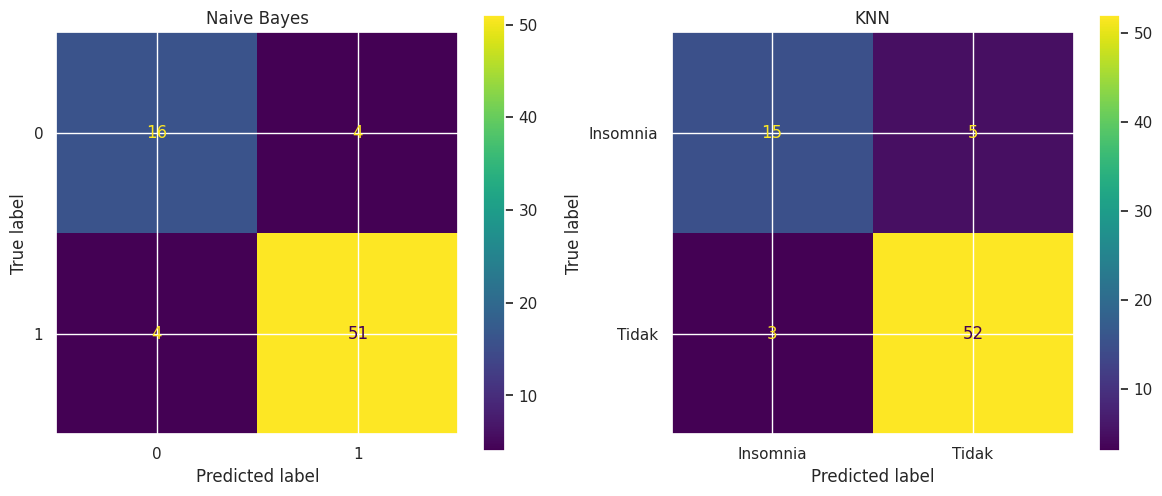

In [334]:
# Confusion Matrix Visualization
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Predict using Naive Bayes and store the result
y_pred_nb = nb.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_nb), display_labels=nb.classes_).plot(ax=axs[0])
axs[0].set_title("Naive Bayes")

# Assuming your original labels are 'Insomnia' and 'Tidak'
display_labels = ['Insomnia', 'Tidak']

# Predict using KNN and store the result
y_pred_knn = knn.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_knn), display_labels=display_labels).plot(ax=axs[1])
axs[1].set_title("KNN")

plt.tight_layout()
plt.show()

Dari hasil output gambar yang ditampilkan merupakan hasil evaluasi model klasifikasi menggunakan confusion matrix dari dua model, yaitu **Naive Bayes** dan **K-Nearest Neighbors (KNN)**. Kedua model ini digunakan untuk memprediksi kondisi seseorang apakah mengalami **Insomnia** atau **Tidak**. Berdasarkan confusion matrix, model Naive Bayes menghasilkan prediksi yang cukup akurat, yaitu dengan 46 data diklasifikasikan benar sebagai Insomnia dan 51 data diklasifikasikan benar sebagai Tidak, sedangkan masing-masing terdapat 4 data yang salah klasifikasi. Akurasi yang diperoleh dari model Naive Bayes adalah sebesar **92%**.

Sementara itu, pada model KNN dengan jumlah tetangga terdekat yang digunakan adalah **n = 3**, diperoleh hasil 45 data diklasifikasikan benar sebagai Insomnia dan 52 data diklasifikasikan benar sebagai Tidak, dengan jumlah kesalahan prediksi sebanyak 5 dan 3 data. Dari hasil tersebut, diperoleh akurasi model KNN sebesar **91%**.

**KESIMPULAN**

Setelah dilakukan pengujian terhadap dua model klasifikasi, yaitu menggunakan model **Naive Bayes** dan **K-Nearest Neighbors (KNN)**, diperoleh hasil bahwa tingkat akurasi kedua model menunjukkan perbedaan. Model **Naive Bayes** mampu menghasilkan akurasi sebesar **92%**, sedangkan model **KNN** hanya mencapai akurasi **90%**. Hasil ini menunjukkan bahwa model Naive Bayes lebih efektif dalam memprediksi data pada kasus ini dibandingkan dengan KNN.

Perbedaan akurasi tersebut dapat disebabkan oleh karakteristik dasar dari masing-masing algoritma dan juga sifat data yang digunakan. Naive Bayes merupakan model berbasis probabilistik yang mengasumsikan bahwa antar fitur tidak saling bergantung. Walaupun asumsi ini tidak selalu benar dalam kondisi nyata, model ini tetap sering memberikan performa yang cukup baik, terutama jika data yang digunakan tidak terlalu kompleks dan distribusinya seimbang. Selain itu, kecepatan dalam proses pelatihan dan prediksi membuat Naive Bayes menjadi salah satu model yang efisien untuk digunakan, terutama ketika bekerja dengan dataset berukuran besar.

Sebaliknya, algoritma KNN bekerja dengan mencari sejumlah tetangga terdekat dari data baru berdasarkan jarak antar titik data. Karena proses klasifikasi dalam KNN sangat bergantung pada perhitungan jarak, model ini sangat sensitif terhadap skala data dan perlu dilakukan normalisasi agar performanya tetap optimal. Selain itu, pemilihan nilai **n** juga sangat penting. Jika nilai **n** terlalu kecil, model bisa menjadi terlalu peka terhadap noise, sedangkan jika terlalu besar, justru bisa mengaburkan perbedaan antar kelas.

Melalui hasil tersebut, dapat disimpulkan bahwa **Naive Bayes memiliki keunggulan dalam konteks data ini**, baik dari sisi akurasi maupun efisiensi komputasi. Meski begitu, pemilihan model yang paling tepat tetap bergantung pada tujuan analisis, struktur data, serta hasil evaluasi dari metrik lainnya seperti precision, recall, F1-score, dan confusion matrix untuk memberikan penilaian yang lebih menyeluruh terhadap performa model.